In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings

from datetime import datetime
sns.set()

### Importing the Data

In [2]:
raw_csv_data = pd.read_csv("data/BTC-USD_2017_2022.csv")
btc_data = raw_csv_data.copy()

In [3]:
btc_data = btc_data[['Date', 'Close', 'Volume']]

### Examining the Data

In [4]:
btc_data 

,Date,Close,Volume
0,2017-12-31,14156.400391,12136299520
1,2018-01-01,13657.200195,10291200000
2,2018-01-02,14982.099609,16846600192
3,2018-01-03,15201.000000,16871900160
4,2018-01-04,15599.200195,21783199744
...,...,...,...
1600,2022-05-19,30314.333984,33773447707
1601,2022-05-20,29200.740234,30749382605
1602,2022-05-21,29432.226563,17274840442
1603,2022-05-22,30323.722656,21631532270


In [5]:
btc_data.describe()

,Close,Volume
count,1605.000000,1.605000e+03
mean,20290.127245,2.600087e+10
std,18069.916791,2.046139e+10
min,3236.761719,2.923670e+09
25%,7321.040039,9.469185e+09
50%,9965.570313,2.313454e+10
75%,37138.234375,3.575957e+10
max,67566.828125,3.509679e+11


In [6]:
btc_data.isna()

,Date,Close,Volume
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1600,False,False,False
1601,False,False,False
1602,False,False,False
1603,False,False,False


In [7]:
btc_data.Close.isna().sum()

0

### Plotting the Data

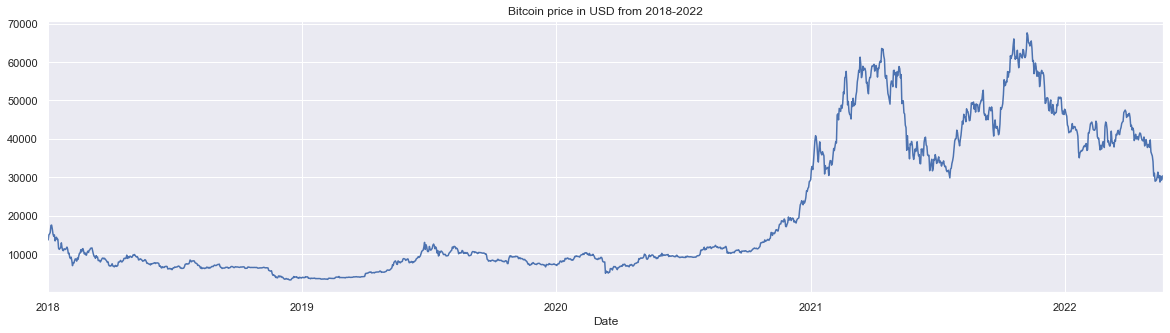

In [30]:
btc_data.Close.plot(figsize=(20,5), title= 'Bitcoin price in USD from 2018-2022');

### The QQ Plot
Quantile-quantile: to determine whether data is distributed in a Normal distribution.

In [9]:
import scipy.stats
import pylab

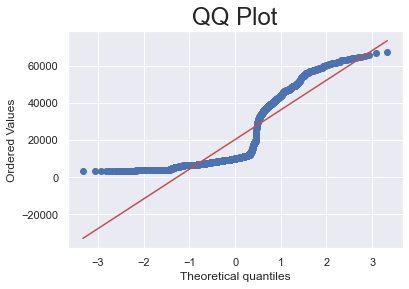

In [10]:
scipy.stats.probplot(btc_data.Close, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

There are far more zeros compare to theoretical normal distributioin. Therefore, the data does not follow a normal distribution.

### Setting the Desired Frequency

In [11]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'], dayfirst = True)
btc_data.set_index("Date", inplace = True)

In [12]:
btc_data

,Close,Volume
Date,,
2017-12-31,14156.400391,12136299520
2018-01-01,13657.200195,10291200000
2018-01-02,14982.099609,16846600192
2018-01-03,15201.000000,16871900160
2018-01-04,15599.200195,21783199744
...,...,...
2022-05-19,30314.333984,33773447707
2022-05-20,29200.740234,30749382605
2022-05-21,29432.226563,17274840442


In [13]:
btc_data_daily=btc_data.asfreq('d')

In [14]:
btc_data_daily

,Close,Volume
Date,,
2017-12-31,14156.400391,12136299520
2018-01-01,13657.200195,10291200000
2018-01-02,14982.099609,16846600192
2018-01-03,15201.000000,16871900160
2018-01-04,15599.200195,21783199744
...,...,...
2022-05-19,30314.333984,33773447707
2022-05-20,29200.740234,30749382605
2022-05-21,29432.226563,17274840442


### Splitting the Data

In [15]:
size = int(len(btc_data)*0.8)
df_train = btc_data.iloc[:size]
df_test = btc_data.iloc[size:]
df_train.tail()

,Close,Volume
Date,,
2021-07-02,33897.046875,38728974942
2021-07-03,34668.546875,24383958643
2021-07-04,35287.781250,24924307911
2021-07-05,33746.003906,26721554282
2021-07-06,34235.195313,26501259870


In [16]:
df_test.head()

,Close,Volume
Date,,
2021-07-07,33855.328125,24796027477
2021-07-08,32877.371094,29910396946
2021-07-09,33798.011719,27436021028
2021-07-10,33520.519531,22971873468
2021-07-11,34240.187500,20108729370


### White Noise

In [17]:
warnings.filterwarnings('ignore')

In [18]:
wn = np.random.normal(loc = df_train.Close.mean(), scale = df_train.Close.std(), size = len(df_train))
df_train['wn'] = wn
df_train.describe()

,Close,Volume,wn
count,1284.000000,1.284000e+03,1284.000000
mean,14066.783022,2.469635e+10,14258.642937
std,13969.690151,2.219995e+10,14138.492175
min,3236.761719,2.923670e+09,-28218.408830
25%,6750.277588,6.958682e+09,4885.015453
50%,8998.779297,1.897672e+10,14034.732976
75%,11515.344482,3.535181e+10,23558.135165
max,63503.457031,3.509679e+11,63739.873839


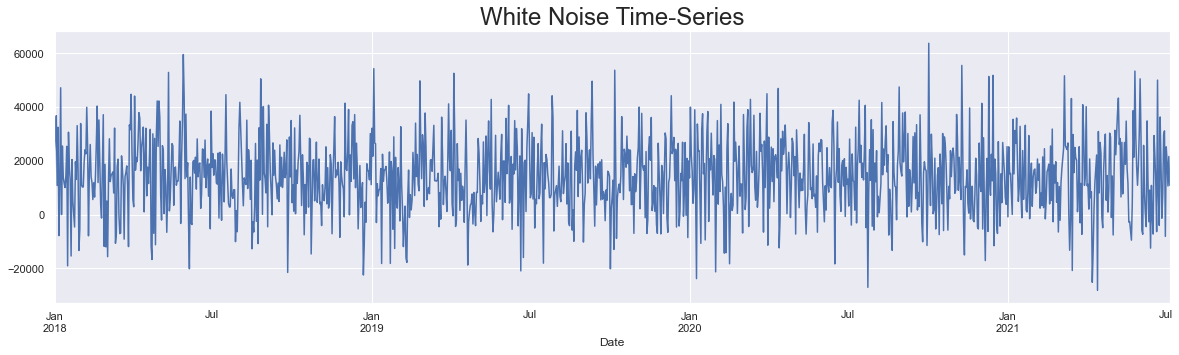

In [19]:
df_train.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

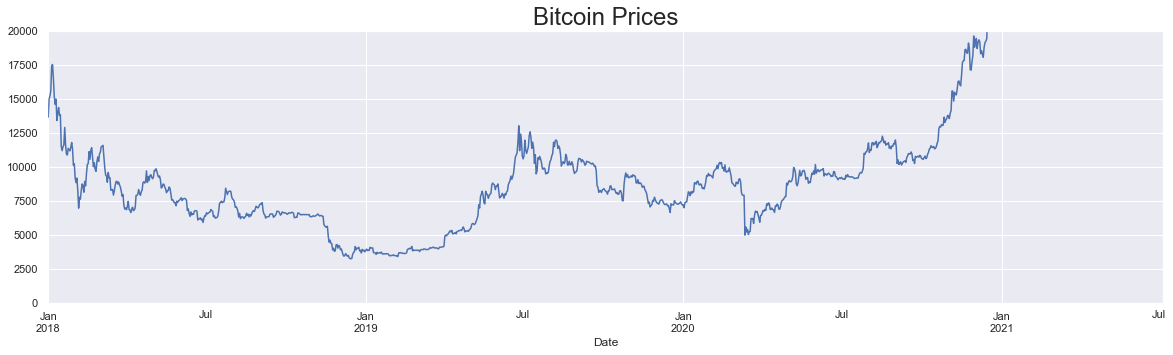

In [28]:
df_train.Close.plot(figsize=(20,5))
plt.title("Bitcoin Prices", size = 24)
plt.ylim(0,20000)
plt.show()

### Stationarity

In [21]:
df_train = df_train.astype('float32')

In [22]:
import sys
print (sys.version)

3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]


In [23]:
sts.adfuller(df_train.Close)

(-0.5948547474855241,
 0.8721404097622594,
 21,
 1262,
 {'1%': -3.43554227494792,
  '5%': -2.8638329319593185,
  '10%': -2.5679907811664124},
 20556.18570093484)

Non stationary

### Seasonality


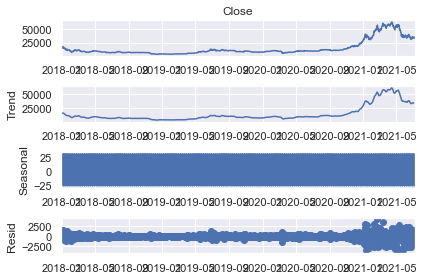

In [24]:
s_dec_additive = seasonal_decompose(df_train.Close, model = "additive")
s_dec_additive.plot()
plt.show()

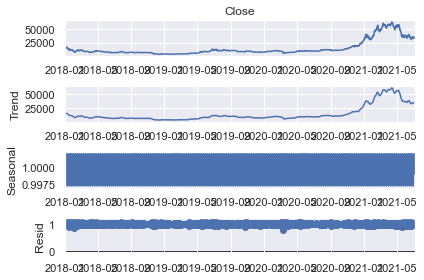

In [25]:
s_dec_multiplicative = seasonal_decompose(df_train.Close, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF


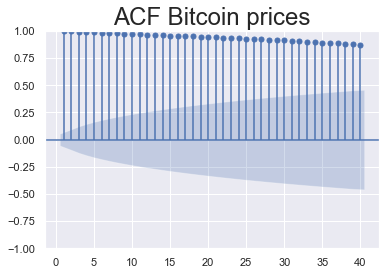

In [26]:
sgt.plot_acf(df_train.Close, lags = 40, zero = False)
plt.title("ACF Bitcoin prices", size = 24)
plt.show()

### PACF

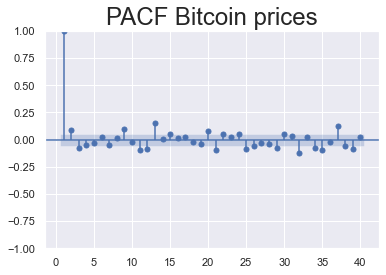

In [27]:
sgt.plot_pacf(df_train.Close, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Bitcoin prices", size = 24)
plt.show()